 # Self Organizing Maps
 
Self-organizing map (SOM) is a form of artificial neural network. It is trained by using unsupervised learning to generate a two-dimensional presentation of the input metrics. Therefore, SOM is one algorithm can realize dimensionality reduction. SOM is an appro- priate tool for visualizing low-dimensional graphs of high-dimensional input data for its function of preserving the topological properties of the input data space.

Experiments
Regarding the SOM, we intended to explore the influence of changing inherent variables of the algorithm. In the first experiment, the number of iterations were set as 500, 1000, and 2000 and the other parameters were fixed as following: OP learning rate = 1.0; Tuning phase (TP) learning rate = 1; TP Neighborhood distance = 1; and Map size = 20x20. In the second experiment, the number of iterations was fixed as 500, and the Neighbourhood distance was fixed at 1. While the Map size were set as 10×10, 20×20, 30×30. In the third experiment, the OP steps were fixed in 500 iterations and the TP Neighborhood distances were set as 1, 10 and 20, while the other variables were not mod- ified.

Results
SOM neighborhood weight distance graph, which indicates the distances between neighboring neurons.



In [42]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
import csv

In [65]:
data_location = './data/08/08_Gang_08_06.csv'
data = pd.read_csv(data_location, engine='python', sep=None)
data.head()

,"Time,s","Lumbar Flexion,deg","Lumbar Lateral - RT,deg","Lumbar Axial - RT,deg","Thoracic Flexion,deg","Thoracic Lateral - RT,deg","Thoracic Axial - RT,deg","LT Ellbogen Flexion,deg","RT Ellbogen Flexion,deg","LT Shoulder Total Flexion,deg",...,"LT Foot Rot Z,","RT Thigh Rot X,","RT Thigh Rot Y,","RT Thigh Rot Z,","RT Shank Rot X,","RT Shank Rot Y,","RT Shank Rot Z,","RT Foot Rot X,","RT Foot Rot Y,","RT Foot Rot Z,"
0,0.00,-2.28029,-0.849243,-2.46957,9.59197,2.30105,2.90141,2.01718,2.99307,7.76251,...,-0.122504,-0.585497,-0.521771,-0.457496,-0.501509,-0.572866,-0.428322,-0.298473,-0.206124,-0.348768
1,0.01,-2.28547,-0.888489,-2.45537,9.59511,2.29669,2.89249,2.10137,3.05827,7.78534,...,-0.122566,-0.585300,-0.522125,-0.457912,-0.502162,-0.571989,-0.428611,-0.299027,-0.206187,-0.348529
2,0.02,-2.29706,-0.941907,-2.46957,9.59745,2.31097,2.90974,2.20822,3.11493,7.81732,...,-0.122565,-0.585059,-0.522616,-0.458159,-0.502826,-0.571188,-0.428909,-0.299511,-0.206368,-0.348341
3,0.03,-2.30534,-1.004260,-2.47844,9.60958,2.34108,2.92164,2.31571,3.18463,7.87821,...,-0.122502,-0.584932,-0.523039,-0.458399,-0.503274,-0.570663,-0.428989,-0.300249,-0.206494,-0.348042
4,0.04,-2.30203,-1.062040,-2.48998,9.61506,2.38460,2.94721,2.45429,3.25163,7.94165,...,-0.122446,-0.584737,-0.523334,-0.458817,-0.503211,-0.570599,-0.428804,-0.301405,-0.206552,-0.347489


In [66]:
new_data = pd.DataFrame(data)
data = new_data.iloc[:, 87:177]

def plot_one_type(som, data, color):
    proj = som.project_data(data)
    coord = som.bmu_ind_to_xy(proj)
    plt.subplot(321)
    plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c=color,
                            marker='o', cmap='jet', linewidths=3, edgecolor=color)

In [67]:
data = data.values
mapsize = [50,50]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy') 
som.train(n_job=1, verbose='debug', train_rough_len=500)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 1064 and data dimension is 90
      > map size is 50,50
      > array size in log10 scale is 8.379124146070392
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 pca_linear_initialization took: 0.066000 seconds
 Rough training...
 radius_ini: 7.000000 , radius_final: 1.750000, trainlen: 500

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.042000 seconds
 epoch: 1 ---> elapsed time:  0.355000, quantization error: 6.976589

 find_bmu took: 0.103000 seconds
 update_codebook_voronoi took: 0.048000 seconds
 epoch: 2 ---> elapsed time:  0.322000, quantization error: 6.402723

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.034000 seconds
 epoch: 3 ---> elapsed time:  0.309000, quantization error: 5.472850

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.044000 seconds
 epoch: 4 --->

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 52 ---> elapsed time:  0.287000, quantization error: 4.784795

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.038000 seconds
 epoch: 53 ---> elapsed time:  0.304000, quantization error: 4.781889

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 54 ---> elapsed time:  0.289000, quantization error: 4.778728

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.034000 seconds
 epoch: 55 ---> elapsed time:  0.296000, quantization error: 4.775383

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 56 ---> elapsed time:  0.291000, quantization error: 4.772227

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.036000 seconds
 epoch: 57 ---> elapsed time:  0.299000, quantization error: 4.769021

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.041000 seconds
 epoch:

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 106 ---> elapsed time:  0.326000, quantization error: 4.608789

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 epoch: 107 ---> elapsed time:  0.333000, quantization error: 4.605456

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 108 ---> elapsed time:  0.310000, quantization error: 4.602005

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 109 ---> elapsed time:  0.314000, quantization error: 4.598735

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 110 ---> elapsed time:  0.312000, quantization error: 4.595359

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 111 ---> elapsed time:  0.314000, quantization error: 4.591988

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 160 ---> elapsed time:  0.316000, quantization error: 4.412665

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 161 ---> elapsed time:  0.312000, quantization error: 4.409073

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 epoch: 162 ---> elapsed time:  0.315000, quantization error: 4.405420

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 163 ---> elapsed time:  0.313000, quantization error: 4.401633

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 164 ---> elapsed time:  0.312000, quantization error: 4.397750

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 165 ---> elapsed time:  0.312000, quantization error: 4.393717

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 214 ---> elapsed time:  0.313000, quantization error: 4.192211

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 215 ---> elapsed time:  0.310000, quantization error: 4.187929

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 216 ---> elapsed time:  0.309000, quantization error: 4.183491

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 217 ---> elapsed time:  0.312000, quantization error: 4.179056

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 218 ---> elapsed time:  0.314000, quantization error: 4.174758

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 219 ---> elapsed time:  0.307000, quantization error: 4.170273

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 268 ---> elapsed time:  0.308000, quantization error: 3.932213

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 269 ---> elapsed time:  0.311000, quantization error: 3.927295

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 270 ---> elapsed time:  0.310000, quantization error: 3.922333

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 271 ---> elapsed time:  0.314000, quantization error: 3.917286

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 272 ---> elapsed time:  0.314000, quantization error: 3.912280

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 273 ---> elapsed time:  0.309000, quantization error: 3.907302

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 322 ---> elapsed time:  0.311000, quantization error: 3.633095

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 323 ---> elapsed time:  0.316000, quantization error: 3.627390

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 324 ---> elapsed time:  0.320000, quantization error: 3.621672

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 325 ---> elapsed time:  0.310000, quantization error: 3.616021

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 326 ---> elapsed time:  0.308000, quantization error: 3.610332

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 327 ---> elapsed time:  0.315000, quantization error: 3.604947

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.036000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.023000 seconds
 epoch: 376 ---> elapsed time:  0.335000, quantization error: 3.289217

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 377 ---> elapsed time:  0.330000, quantization error: 3.280874

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 378 ---> elapsed time:  0.312000, quantization error: 3.272727

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 379 ---> elapsed time:  0.317000, quantization error: 3.265182

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 380 ---> elapsed time:  0.311000, quantization error: 3.257583

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 epoch: 381 ---> elapsed time:  0.317000, quantization error: 3.250288

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 430 ---> elapsed time:  0.316000, quantization error: 2.870738

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 epoch: 431 ---> elapsed time:  0.317000, quantization error: 2.862814

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 432 ---> elapsed time:  0.319000, quantization error: 2.854898

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 epoch: 433 ---> elapsed time:  0.316000, quantization error: 2.846913

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 434 ---> elapsed time:  0.315000, quantization error: 2.837533

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 435 ---> elapsed time:  0.308000, quantization error: 2.828924

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 484 ---> elapsed time:  0.317000, quantization error: 2.377735

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.024000 seconds
 epoch: 485 ---> elapsed time:  0.310000, quantization error: 2.367369

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 486 ---> elapsed time:  0.315000, quantization error: 2.356866

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.048000 seconds
 epoch: 487 ---> elapsed time:  0.336000, quantization error: 2.346386

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.025000 seconds
 epoch: 488 ---> elapsed time:  0.314000, quantization error: 2.336376

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.027000 seconds
 epoch: 489 ---> elapsed time:  0.317000, quantization error: 2.326736

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.053000 seconds
 

 epoch: 37 ---> elapsed time:  0.311000, quantization error: 1.880077

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 38 ---> elapsed time:  0.318000, quantization error: 1.869618

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.029000 seconds
 epoch: 39 ---> elapsed time:  0.330000, quantization error: 1.859156

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.028000 seconds
 epoch: 40 ---> elapsed time:  0.325000, quantization error: 1.848050

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.026000 seconds
 epoch: 41 ---> elapsed time:  0.314000, quantization error: 1.836948

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.034000 seconds
 epoch: 42 ---> elapsed time:  0.329000, quantization error: 1.827122

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.041000 seconds
 epoch: 43 ---> elapsed time:  0.333000, quantization error: 1.816925

 find_bmu took: 0

 epoch: 91 ---> elapsed time:  0.380000, quantization error: 1.266450

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.042000 seconds
 epoch: 92 ---> elapsed time:  0.345000, quantization error: 1.253438

 find_bmu took: 0.102000 seconds
 update_codebook_voronoi took: 0.044000 seconds
 epoch: 93 ---> elapsed time:  0.347000, quantization error: 1.240185

 find_bmu took: 0.202000 seconds
 update_codebook_voronoi took: 0.043000 seconds
 epoch: 94 ---> elapsed time:  0.446000, quantization error: 1.228505

 --------------------------------------------------------------
 Final quantization error: 1.228505
 train took: 192.851000 seconds


update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_p

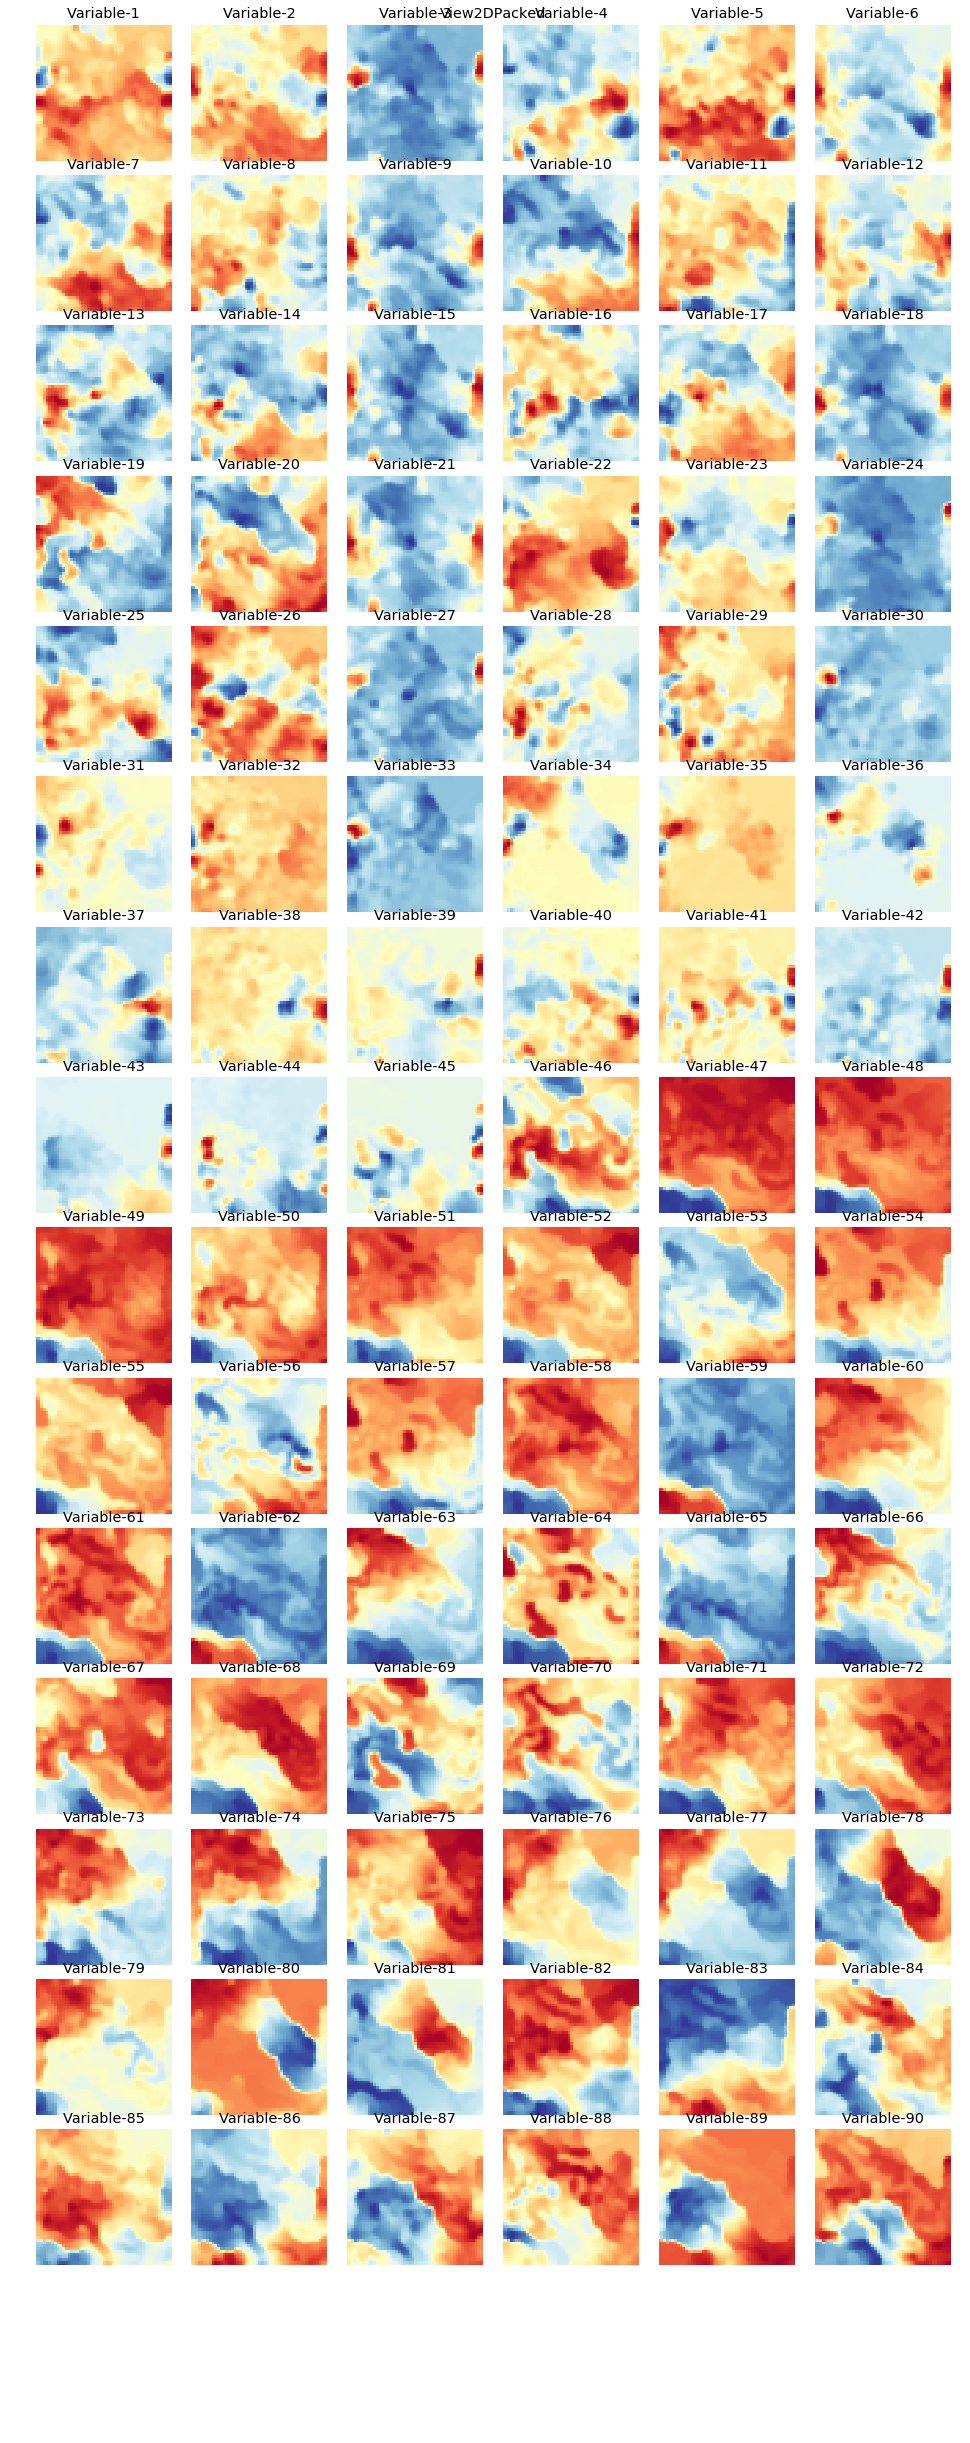

In [68]:
# som.component_names = ["Upper spine Accel Earth X,mG", "Upper spine Accel Earth Y,mG", "Upper spine Accel Earth Z,mG", "LT Upper arm Accel Earth X,mG", "LT Upper arm Accel Earth Y,mG", "LT Upper arm Accel Earth Z,mG"]
v  = sompy.mapview.View2DPacked(5, 5, 'View2DPacked',text_size=12)
v.show(som, what='codebook', cmap=None, col_sz=6) #which_dim='all' default

update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


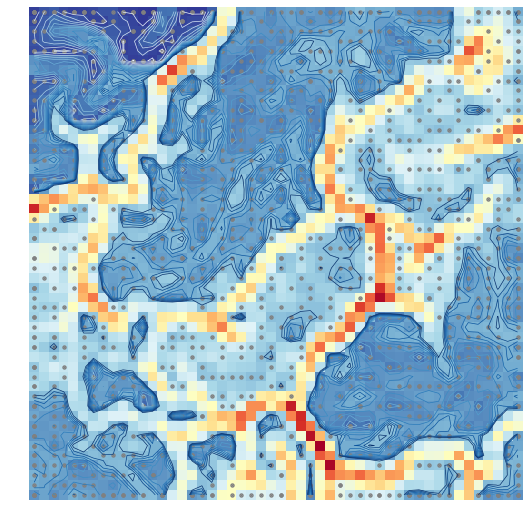

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8a8722b70>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fe8a8722b70>
Setting pcolormesh
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos
update_title_pos


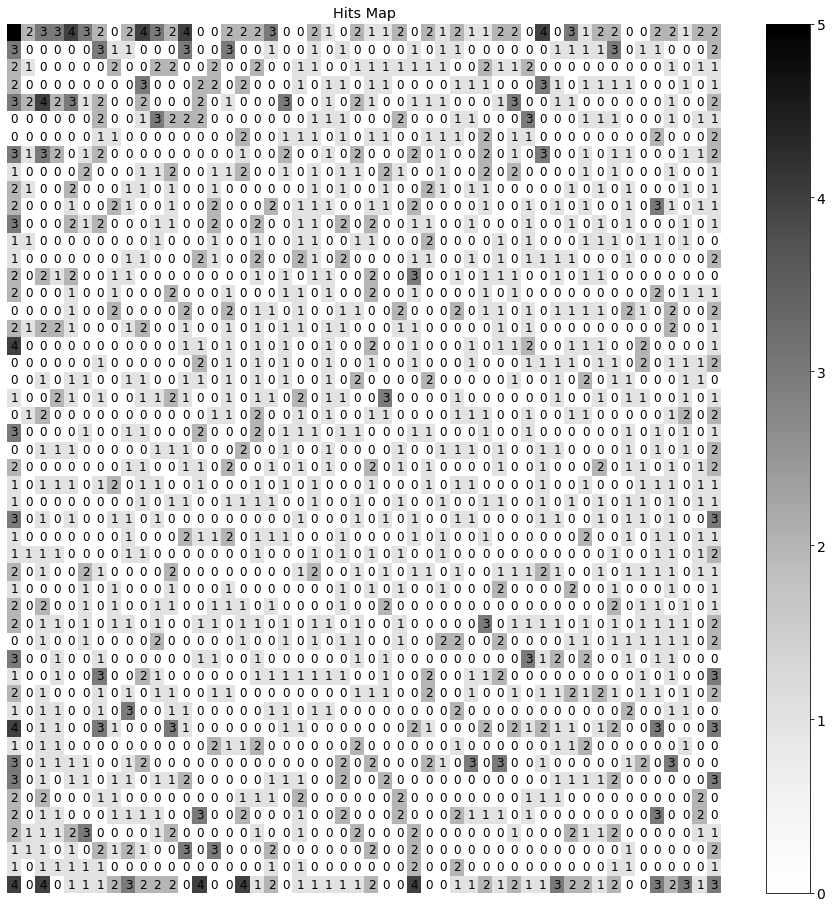

/home/mariana/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
update_title_pos
update_title_pos
update_title_pos
update_title_pos


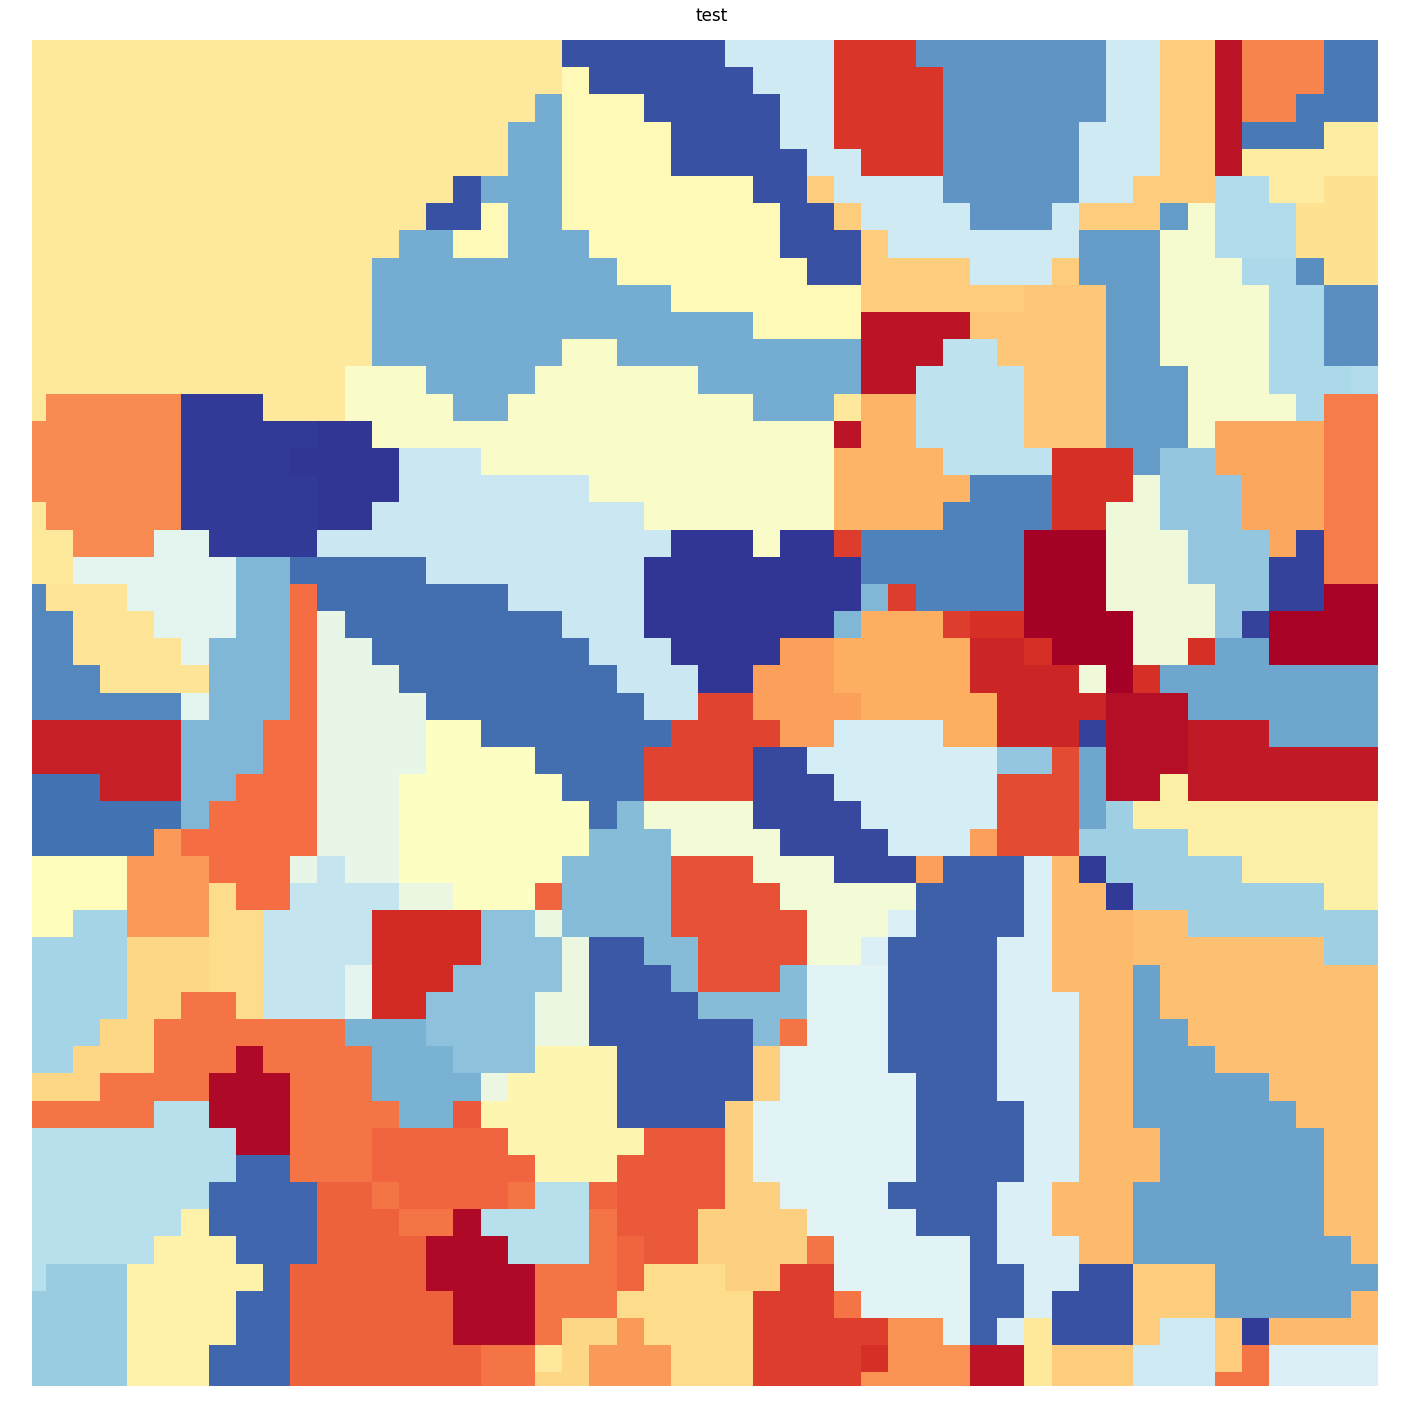

In [48]:
umat = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)
umat.show(som)

from sompy.visualization.bmuhits import BmuHitsView
bmuhits  = BmuHitsView(50,50,"Hits Map",text_size=14)
bmuhits.show(som, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

v  = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  
som.cluster(n_clusters=90)
v.show(som, what='cluster')

NameError: name 'group_1' is not defined